In [1]:
from time import sleep
import numpy as np
import urllib3
import matplotlib
from numpy import append
import config
import vectorbt as vbt
import pandas as pd
import pandas_ta as ta
from datetime import datetime
from alpaca_trade_api.rest import REST
import gym
import gym_anytrading
from tensorflow.keras.models import load_model

from stable_baselines import ACKTR
from stable_baselines.common.evaluation import evaluate_policy

c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\90507\AppD

119

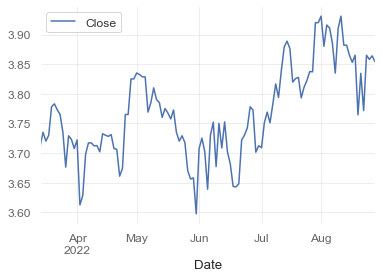

In [2]:
data = vbt.YFData.download(symbols= 'PEN=X', period="119d")
#df = vbt.Portfolio.from_holding(data, init_cash=100)
#print(data.data['TRYUSD=X']['Close'])
X=data.data['PEN=X'].index
Y=data.data['PEN=X'].Close
data.data['PEN=X'].reset_index().plot(x='Date', y='Close')
X=data.data['PEN=X']
solDF = pd.DataFrame(X['Close'])
solDF.size

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
testingSet = pd.DataFrame(solDF)
testing_set_scaled = sc.fit_transform(testingSet)
testing_set_scaled

array([[0.34375712],
       [0.41267758],
       [0.36772986],
       [0.39769525],
       [0.54152953],
       [0.55651186],
       [0.52654648],
       [0.50257445],
       [0.41267758],
       [0.2361938 ],
       [0.39469892],
       [0.37671955],
       [0.33027295],
       [0.37372251],
       [0.04505632],
       [0.09204802],
       [0.30180572],
       [0.35874017],
       [0.35874017],
       [0.34375712],
       [0.345256  ],
       [0.31379174],
       [0.40518677],
       [0.39769525],
       [0.39170188],
       [0.40069157],
       [0.33027295],
       [0.32577846],
       [0.19035518],
       [0.22979607],
       [0.50257445],
       [0.50257445],
       [0.68236677],
       [0.68236677],
       [0.71233215],
       [0.70484063],
       [0.69285462],
       [0.69285462],
       [0.51456046],
       [0.56250522],
       [0.63741833],
       [0.57748756],
       [0.56250522],
       [0.4875914 ],
       [0.53253984],
       [0.51006526],
       [0.48009988],
       [0.525

In [4]:
inputs = solDF[0:].values     #lstm input shape edit
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,solDF.size):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], 1))
#X_test = np.reshape(X_test, (int(X_test.size/60), 60,1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
X_test

array([[[0.34375712],
        [0.41267758],
        [0.36772986],
        ...,
        [0.38271219],
        [0.31529061],
        [0.12445534]],

       [[0.41267758],
        [0.36772986],
        [0.39769525],
        ...,
        [0.31529061],
        [0.12445534],
        [0.39769525]],

       [[0.36772986],
        [0.39769525],
        [0.54152953],
        ...,
        [0.12445534],
        [0.39769525],
        [0.46361938]],

       ...,

       [[0.33027295],
        [0.38271219],
        [0.31529061],
        ...,
        [0.71083399],
        [0.5219141 ],
        [0.80222831]],

       [[0.38271219],
        [0.31529061],
        [0.12445534],
        ...,
        [0.5219141 ],
        [0.80222831],
        [0.78125261]],

       [[0.31529061],
        [0.12445534],
        [0.39769525],
        ...,
        [0.80222831],
        [0.78125261],
        [0.79923199]]])

In [6]:
sol_model = load_model('Sol_BOT.bot')
predicted_close_value = sol_model.predict(X_test)
predicted_close_value = sc.inverse_transform(predicted_close_value)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
predicted_close_value = pd.DataFrame(predicted_close_value)
predicted_close_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59 non-null     float32
dtypes: float32(1)
memory usage: 364.0 bytes


In [8]:
test_data = solDF[60:]
real_close_value = test_data.iloc[0:60].values
#real_close_value = liraDF[60:]

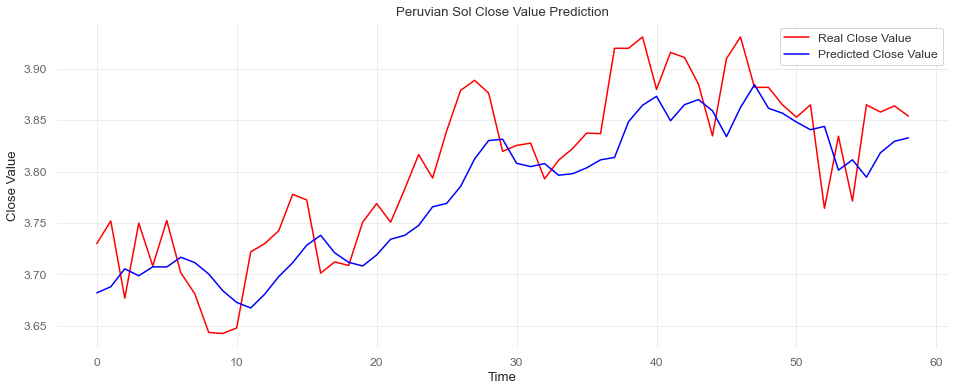

In [9]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(6)
plt.plot(real_close_value, color='red', label='Real Close Value')
plt.plot(predicted_close_value, color='blue', label='Predicted Close Value')
plt.title('Peruvian Sol Close Value Prediction')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()
plt.show()

In [10]:
from scipy.stats import pearsonr
from pingouin import corr
from researchpy.correlation import corr_case

In [11]:
result = pd.DataFrame(real_close_value)
result.insert(1,"Predicted", pd.DataFrame(predicted_close_value))
result.columns=["Real","Predicted"]
print("Correlation Between Real and Predicted Values = %",100*result["Real"].corr(result["Predicted"],method="pearson"))
accuracy = 100 * np.mean(np.abs(real_close_value-predicted_close_value) / real_close_value)
print("Percentage of Accuracy Between Real and Predicted Values = %01.3f" %(100 - accuracy,))

Correlation Between Real and Predicted Values = % 86.82422159850631
Percentage of Accuracy Between Real and Predicted Values = 98.960


In [12]:
predicted_close_value = np.array(predicted_close_value)
predicted_close_value[-1]

array([3.8329144], dtype=float32)

In [13]:
predictions_SOL2 = predicted_close_value
%store predictions_SOL2

Stored 'predictions_SOL2' (ndarray)


In [15]:
print(predictions_SOL2[0:5])

[[3.682153 ]
 [3.6880589]
 [3.705544 ]
 [3.698739 ]
 [3.7075028]]
